# Wczytanie bibliotek

In [15]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
%matplotlib inline

# Regresja liniowa

### Ćwiczenie 1: regresja liniowa, przykład ilustracyjny

Dla danych dane1 dotyczących wielkości czynszu za mieszkanie w zależności od jego wielkości, zbuduj model 
regresji liniowej na danych treningowych i oceń dopasowanie na danych testowych. Znajdź równanie prostej regresji i przedstaw ją 
na wykresie.

In [2]:
dane1 = pd.read_csv("dane1.csv")

In [3]:
dane1.head()

,rent,size
0,410.97,40
1,175.81,61
2,1113.78,140
3,314.74,59
4,551.55,57


In [4]:
dane1.describe()

,rent,size
count,100.000000,100.000000
mean,595.513300,69.550000
std,242.718557,23.773075
min,163.170000,27.000000
25%,426.360000,52.750000
50%,563.985000,68.000000
75%,755.555000,82.250000
max,1288.480000,146.000000


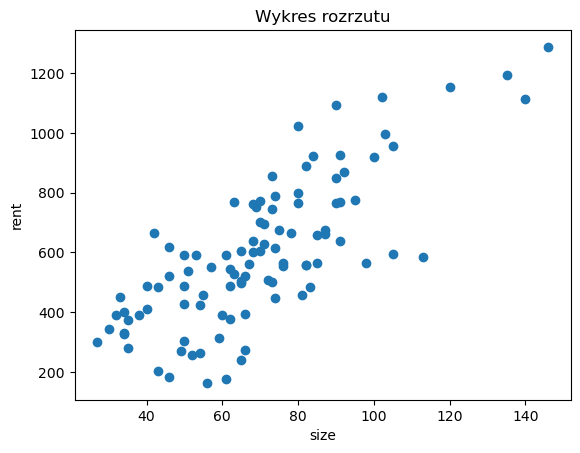

In [5]:
plt.scatter(dane1["size"], dane1["rent"])
plt.title("Wykres rozrzutu")
plt.xlabel("size")
plt.ylabel("rent")
plt.show()

In [6]:
dane1.corr()

,rent,size
rent,1.000000,0.772484
size,0.772484,1.000000


podział zbioru na treingowy (75%) i testowy (25%)

In [39]:
X_train, X_test, y_train, y_test = train_test_split(dane1["size"], dane1["rent"], random_state = 17)

In [40]:
X_train.shape

(75,)

In [41]:
X_test.shape

(25,)

In [42]:
X_train = np.array(X_train).reshape(-1,1)

In [43]:
X_train.shape

(75, 1)

In [44]:
X_test = np.array(X_test).reshape(-1,1)

In [45]:
X_test.shape

(25, 1)

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

Wszystkie modele uczenia maszynowego w bibliotece scikit-learn są implementowane we własnych klasach.
Zanim użyjemy modelu tworzymy instancję klasy w obiekcie. Wtedy możemy ustawić dowolne parametry modelu.
Aby zbudować model na zbiorze treningowym, wywołujemy metodę fit. Dodatkowo, dla modeli nadzorowanych mamy metody predict 
i score.

In [46]:
model1 = LinearRegression()

In [47]:
model1.fit(X_train, y_train)

LinearRegression()

In [48]:
model1.coef_

array([8.42612781])

In [49]:
model1.intercept_

19.478164422552823

Prosta ma równanie: y = 8.43x + 19.48

In [50]:
model1.score(X_train, y_train)

0.6275446996480707

In [51]:
model1.score(X_test, y_test)

0.35489308667177055

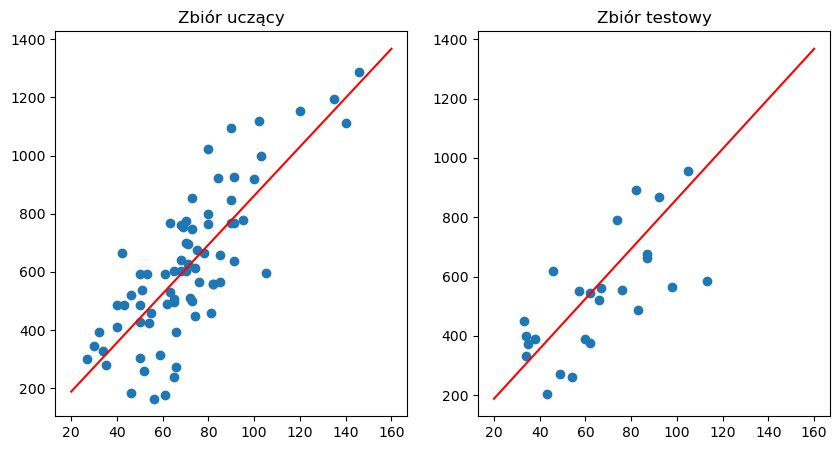

In [52]:
X_line = np.linspace(20, 160, 100).reshape(-1,1)
y_line = model1.predict(X_line)

plt.figure(figsize = (10, 5))

plt.subplot(121)
plt.scatter(X_train, y_train)
plt.plot(X_line, y_line, c = "red")
plt.title("Zbiór uczący")

plt.subplot(122)
plt.scatter(X_test, y_test)
plt.plot(X_line, y_line, c = "red")
plt.title("Zbiór testowy")

plt.show()

### Zadanie 1: obserwacje odstające

Dla danych dane2 dotyczących wielkości czynszu za mieszkanie w zależności od jego wielkości, zbuduj model 
regresji liniowej na danych treningowych i oceń dopasowanie na danych testowych. Znajdź równanie prostej regresji i przedstaw ją 
na wykresie. Dlaczego dopasowanie jest kiepskie i jak je można poprawić?

In [53]:
dane2 = pd.read_csv("dane2.csv")

In [54]:
dane2.describe()

,rent,size
count,102.000000,102.000000
mean,550.308333,71.509804
std,275.561876,28.668382
min,100.000000,24.000000
25%,347.512500,57.000000
50%,521.910000,67.500000
75%,660.545000,85.000000
max,1661.550000,180.000000


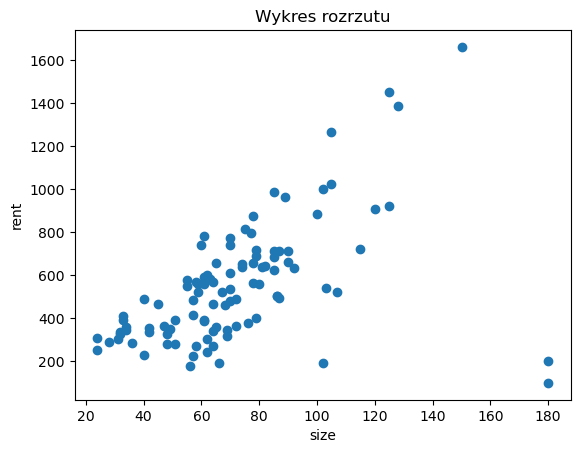

In [55]:
plt.scatter(dane2["size"], dane2["rent"])
plt.title("Wykres rozrzutu")
plt.xlabel("size")
plt.ylabel("rent")
plt.show()

In [56]:
X_train, X_test, y_train, y_test = train_test_split(dane2["size"], dane2["rent"], random_state = 7)

In [57]:
X_train = np.array(X_train).reshape(-1,1)
X_test = np.array(X_test).reshape(-1,1)

In [58]:
model1 = LinearRegression()

In [59]:
model1.fit(X_train, y_train)

LinearRegression()

In [60]:
model1.score(X_train, y_train)

0.15688941249819344

In [61]:
model1.score(X_test, y_test)

0.3166617728651069

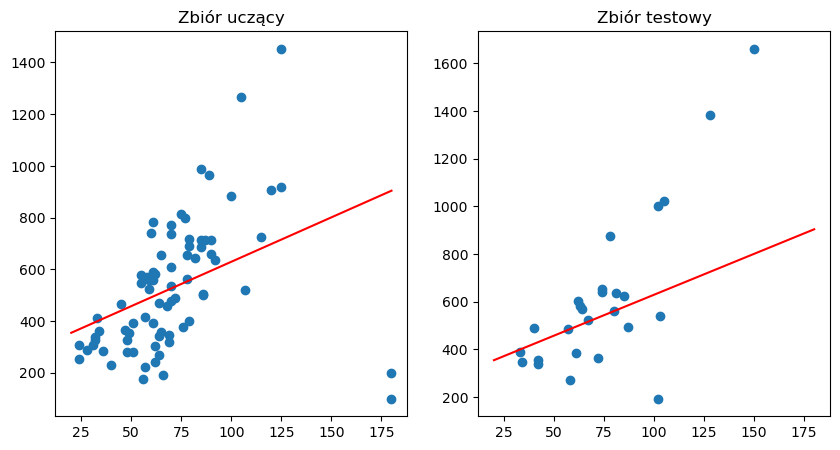

In [63]:
X_line = np.linspace(20, 180, 100).reshape(-1,1)
y_line = model1.predict(X_line)

plt.figure(figsize = (10, 5))

plt.subplot(121)
plt.scatter(X_train, y_train)
plt.plot(X_line, y_line, c = "red")
plt.title("Zbiór uczący")

plt.subplot(122)
plt.scatter(X_test, y_test)
plt.plot(X_line, y_line, c = "red")
plt.title("Zbiór testowy")

plt.show()

Usuwamy obserwacje odstające

In [66]:
def find_outliers_IQR(df):
    q1 = df.quantile(.25)
    q3 = df.quantile(.75)
    IQR = q3 - q1
    outliers = df[((df < (q1 - 1.5*IQR)) | (df > (q3 + 1.5*IQR)))]
    return outliers

In [67]:
outliers_rent = find_outliers_IQR(dane2["rent"])

In [68]:
outliers_rent

1     1266.05
17    1661.55
21    1452.93
70    1385.12
Name: rent, dtype: float64

In [69]:
outliers_size = find_outliers_IQR(dane2["size"])

In [70]:
outliers_size

17     150
70     128
100    180
101    180
Name: size, dtype: int64

Jeżeli to nie błędy, usuwamy ze zbioru treningowego

In [71]:
dane2_wo = dane2.drop([1, 17, 21, 70, 100, 101])

In [72]:
dane2.shape

(102, 2)

In [73]:
dane2_wo.shape

(96, 2)

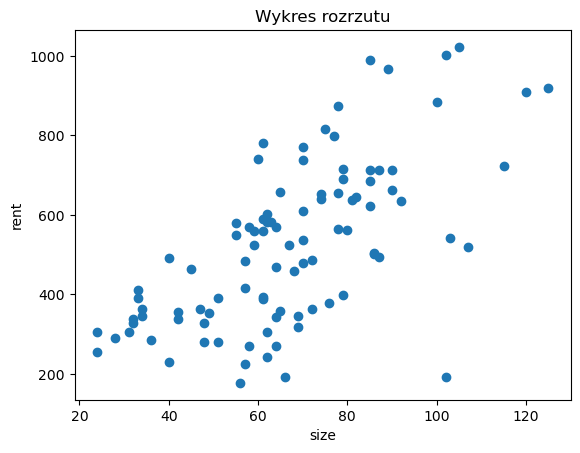

In [74]:
plt.scatter(dane2_wo["size"], dane2_wo["rent"])
plt.title("Wykres rozrzutu")
plt.xlabel("size")
plt.ylabel("rent")
plt.show()

In [76]:
X2_train, X2_test, y2_train, y2_test = train_test_split(dane2_wo["size"], dane2_wo["rent"], random_state = 7)

In [77]:
X2_train = np.array(X2_train).reshape(-1,1)
X2_test = np.array(X2_test).reshape(-1,1)

In [78]:
model2 = LinearRegression()

In [79]:
model2.fit(X2_train, y2_train)

LinearRegression()

In [80]:
model2.score(X2_train, y2_train)

0.4289764346610704

In [81]:
model2.score(X2_test, y2_test)

0.40534130923645517

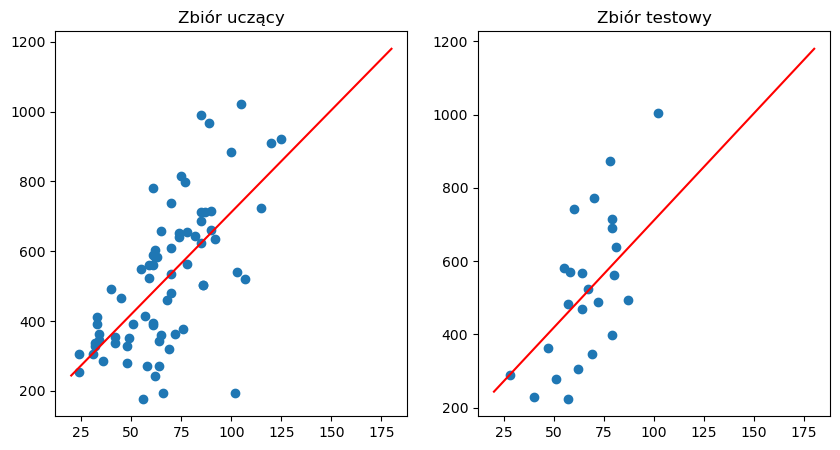

In [82]:
X_line = np.linspace(20, 180, 100).reshape(-1,1)
y_line = model2.predict(X_line)

plt.figure(figsize = (10, 5))

plt.subplot(121)
plt.scatter(X2_train, y2_train)
plt.plot(X_line, y_line, c = "red")
plt.title("Zbiór uczący")

plt.subplot(122)
plt.scatter(X2_test, y2_test)
plt.plot(X_line, y_line, c = "red")
plt.title("Zbiór testowy")

plt.show()

### Zadanie 2: transformacja y

Dla danych dane3 zbuduj model 
regresji liniowej na danych treningowych i oceń dopasowanie na danych testowych. Znajdź równanie prostej regresji i przedstaw ją 
na wykresie. Dlaczego dopasowanie jest kiepskie i jak je można poprawić?

In [84]:
x, y = make_regression(n_samples = 1000, n_features = 1, noise = 100, random_state = 0)
y = np.expm1((y + abs(y.min())) / 200).reshape(-1, 1)
dane3 = pd.DataFrame(np.hstack([x, y]), columns = ["x", "y"])

In [85]:
dane3.describe()

,x,y
count,1000.000000,1000.000000
mean,-0.045257,12.297687
std,0.987527,9.189466
min,-3.046143,0.000000
25%,-0.698420,5.880022
50%,-0.058028,9.817371
75%,0.606951,15.769642
max,2.759355,78.967173


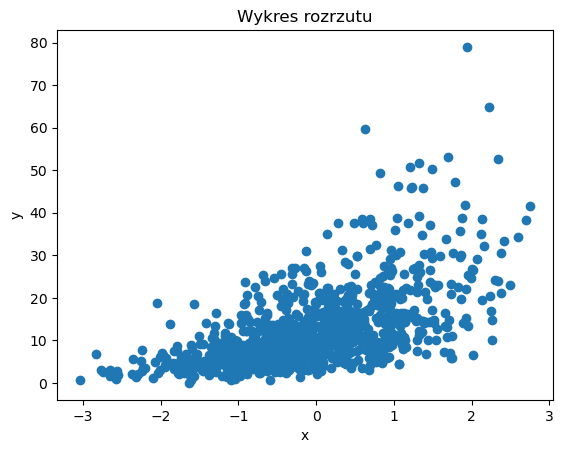

In [86]:
plt.scatter(dane3["x"], dane3["y"])
plt.title("Wykres rozrzutu")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [87]:
X_train, X_test, y_train, y_test = train_test_split(dane3["x"], dane3["y"], random_state = 7)

In [88]:
X_train = np.array(X_train).reshape(-1,1)
X_test = np.array(X_test).reshape(-1,1)

In [89]:
model1 = LinearRegression()

In [90]:
model1.fit(X_train, y_train)

LinearRegression()

In [91]:
model1.score(X_train, y_train)

0.34630287156902206

In [92]:
model1.score(X_test, y_test)

0.31094870313911327

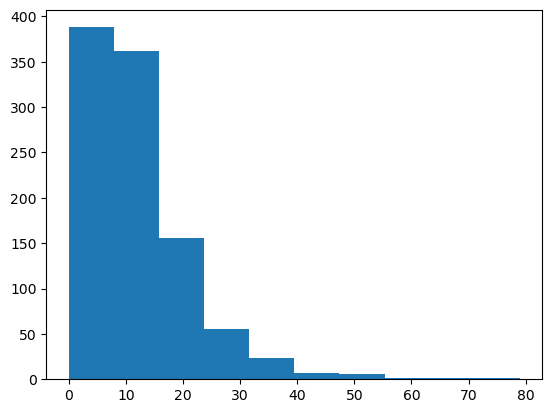

In [93]:
plt.hist(dane3["y"])
plt.show()

Przykładowe transformacje y: log, exp, sqrt. Zmienne objaśniające też można transformaować!! W regresji liniowej
chcemy żeby wszytskie zmienne miałay rozkłady podobne do normalnego.

In [96]:
dane3_log = dane3
dane3_log["y"] = np.log1p(dane3["y"]) # f(y) = ln(1+y)

Uwaga na transformacje! Dla predykcji wynik transformujemy fcją odwrotną!!!

In [97]:
dane3_log.describe()

,x,y
count,1000.000000,1000.000000
mean,-0.045257,1.200453
std,0.987527,0.200264
min,-3.046143,0.000000
25%,-0.698420,1.074532
50%,-0.058028,1.218217
75%,0.606951,1.340138
max,2.759355,1.682989


### Ćwiczenie 2: zmienne jakościowe

Dla danych dane4 zbuduj model 
regresji liniowej na danych treningowych i oceń dopasowanie na danych testowych. Zmienną jakościową 
area zakoduj za pomocą zmiennych binarnych.

In [7]:
dane4 = pd.read_csv("dane4.csv")

### Zadanie 3: Fish

https://www.kaggle.com/datasets/aungpyaeap/fish-market?resource=download

Dla danych Fish z Kaggle zbuduj model 
regresji liniowej na danych treningowych i oceń dopasowanie na danych testowych. Zmienną jakościowe zakoduj za pomocą zmiennych binarnych. Zmienną objaśnianą jest Weight.

In [8]:
Fish = pd.read_csv("Fish.csv")

### Ćwiczenie 3: dodawanie wielomianów cech oryginalnych

Do danych dane5 (dane Bodyfat) dodaj wielomiany drugiego stopnia i stwórz zbiór uczący z większą liczbą zmiennych objaśniających. 

https://cran.r-project.org/web/packages/bbreg/bbreg.pdf

In [9]:
dane5 = pd.read_csv("dane5.csv")

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html

### Ćwiczenie 3 c.d.: LASSO, zbiór walidacyjny

Dla danych X_poly i y zbuduj model regresji LASSO, wybierz najlepszy parametr alpha i oceń dopasowanie na 
zbiorze testowym. Porównaj wynik ze zwykłą metodą najmniejszych kwadratów.

# Źródła:

Hastie, Trevor, et al. The elements of statistical learning: data mining, inference, and prediction. Vol. 2. New York: springer, 2009.

Muller, Andreas, et al. Machine learning, Python i data science, Wprowadzenie. Helion, 2021.

Sklearn tutorials